This file is to analyse the rating behaviour of documentary movies over 121 years; starting from 1894 until 2015.

Importing libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

reading the movie dataframe

In [4]:
Mov = pd.read_csv('/Users/lamahamadeh/Downloads/ml-20m/movies.csv')
print ('Shape', Mov.shape)
print (Mov.head(5))
print (Mov.describe())

Shape (27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
             movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000


Splitting the year from the tilte coloum to a separate colum called 'year'

In [5]:
Mov['year'] = Mov['title'].str.extract('.*\((.*)\).*',expand = True)
print(Mov.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995  


Read the ratings dataframe

In [7]:
rat = pd.read_csv('/Users/lamahamadeh/Downloads/ml-20m/ratings.csv')
del rat['timestamp']
print ('Shape',rat.shape)
print (rat.tail(4))
print (rat.describe())

Shape (20000263, 3)
          userId  movieId  rating
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5
             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00


Create the Box_office dataframe which is the merging between Mov and rat dataframs.

In [8]:
avg_rat = rat.groupby('movieId', as_index = False).mean()
box_office = Mov.merge(avg_rat, on = 'movieId', how = 'inner')
print ('Shape',box_office.shape)
print(box_office.head(5))

Shape (26744, 6)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year        userId    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  69282.396821  3.921240  
1                   Adventure|Children|Fantasy  1995  69169.928202  3.211977  
2                               Comedy|Romance  1995  69072.079388  3.151040  
3                         Comedy|Drama|Romance  1995  69652.913280  2.861393  
4                                       Comedy  1995  69113.475454  3.064592  


Create the documentary sub-dataframe 

In [9]:
Doc = box_office [(box_office.genres == 'Documentary')]
print(Doc.head(5))
print(Doc.shape)
print (Doc.dtypes)

     movieId                                 title       genres  year  \
76        77                      Nico Icon (1995)  Documentary  1995   
97        99  Heidi Fleiss: Hollywood Madam (1995)  Documentary  1995   
106      108                        Catwalk (1996)  Documentary  1996   
114      116          Anne Frank Remembered (1995)  Documentary  1995   
126      128                 Jupiter's Wife (1994)  Documentary  1994   

           userId    rating  
76   69214.904977  3.429864  
97   70378.853994  3.105372  
106  71305.304000  3.092000  
114  69986.770285  3.937302  
126  63884.613333  3.500000  
(1879, 6)
movieId      int64
title       object
genres      object
year        object
userId     float64
rating     float64
dtype: object


Changing the type of year coloum from object to numeric

In [10]:
Doc['year'] = pd.to_numeric(Doc['year'], errors='coerce')
print('Year Min:', Doc['year'].min(), 'Year Max:', Doc['year'].max())
print (Doc.dtypes)

Year Min: 1894.0 Year Max: 2015.0
movieId      int64
title       object
genres      object
year       float64
userId     float64
rating     float64
dtype: object


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Data Visulaisation

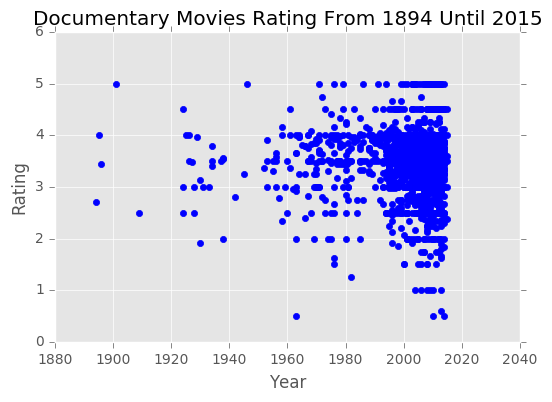

In [11]:
plt.scatter(x=Doc['year'],y=Doc['rating'],color = 'blue')
plt.title('Documentary Movies Rating From 1894 Until 2015')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()